In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [2]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.drop('Gender',inplace = True,axis=1)

In [4]:
df.sample(5)
df.drop('User ID',inplace = True,axis=1)

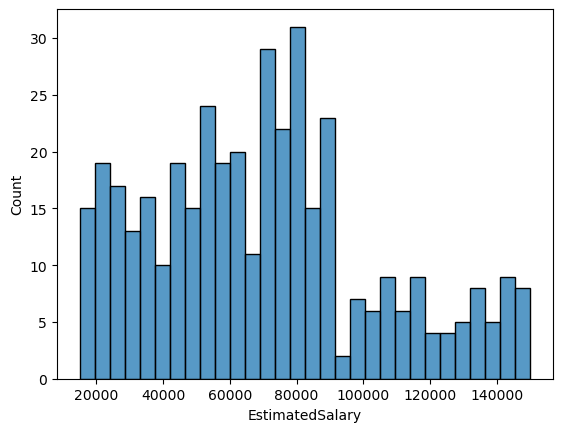

In [5]:
sns.histplot(x='EstimatedSalary',data=df,bins = 30)
plt.show()

In [6]:
df['EstimatedSalary'].min()
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=101)


In [12]:
x_train.shape

(320, 2)

In [13]:
y_train.shape

(320,)

In [14]:
x_test.shape

(80, 2)

In [15]:
y_test.shape

(80,)

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [17]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [18]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [19]:
x_train_scaled

,Age,EstimatedSalary
0,0.701967,-1.289202
1,-0.955456,-0.310976
2,-0.955456,0.281888
3,0.019499,1.260115
4,0.994454,2.030838
...,...,...
315,-0.565474,1.497260
316,0.311985,0.074386
317,-0.272987,0.281888
318,-1.150446,-0.518478


In [20]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.2,2.4


In [21]:
np.round(x_test_scaled.describe(),1)

,Age,EstimatedSalary
count,80.0,80.0
mean,-0.1,0.0
std,1.1,1.1
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.6
max,2.2,2.4


Text(0.5, 1.0, 'After Scaling')

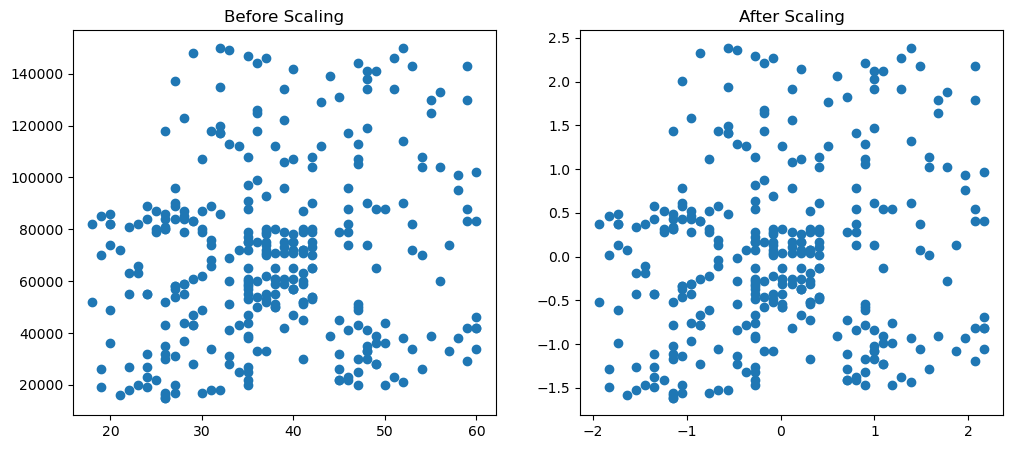

In [22]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")         # data got centered

<Axes: title={'center': 'After scaling'}, xlabel='Age', ylabel='Density'>

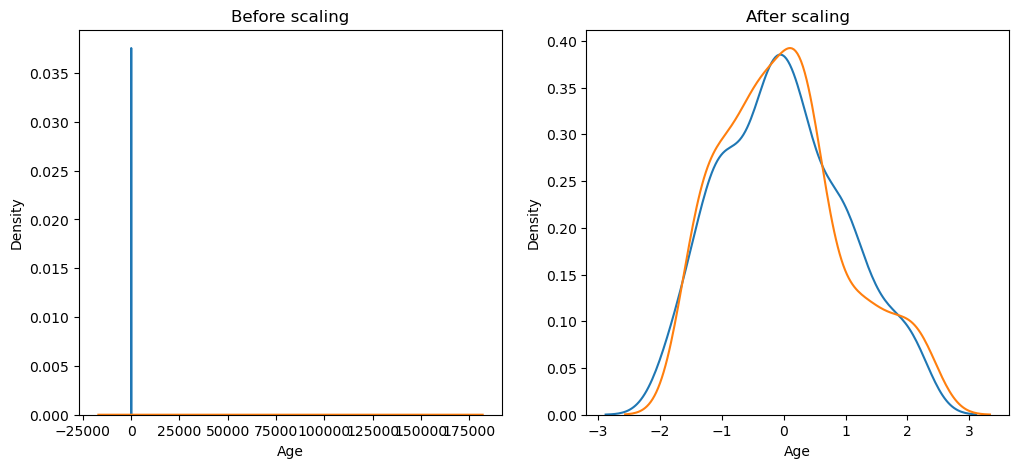

In [52]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)


In [ ]:
# PCA is essentially a dimensional reduction technique